Silhouette Score: 0.019191217618310375

Cluster 0:
['New ransomware attack targeting financial institutions'
 'DDoS attack targeting government websites'
 'New variant of Emotet malware targeting businesses'
 'Critical flaw in Windows SMB service exploited in global attack'
 'Large-scale botnet used for distributed denial of service (DDoS) attacks'
 'New malware sample identified targeting IoT devices'
 'DDoS attack using IoT devices as botnet amplifiers'
 'Zero-day exploit targeting Adobe Flash Player discovered']

Cluster 1:
['APT group exploiting zero-day vulnerability in web servers'
 'New vulnerability in VPN software exposed to public'
 'Exploit in JavaScript engine allows remote code execution'
 'SQL injection vulnerability discovered in popular CMS'
 'Cyber espionage group using social engineering to steal data'
 'Trojan virus detected in software updates of widely used application'
 'Ransomware as a Service platform discovered on the dark web'
 'APT group using compromised Sol

/home/sataporn/.local/share/virtualenvs/flaskApp0-991fy1py/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


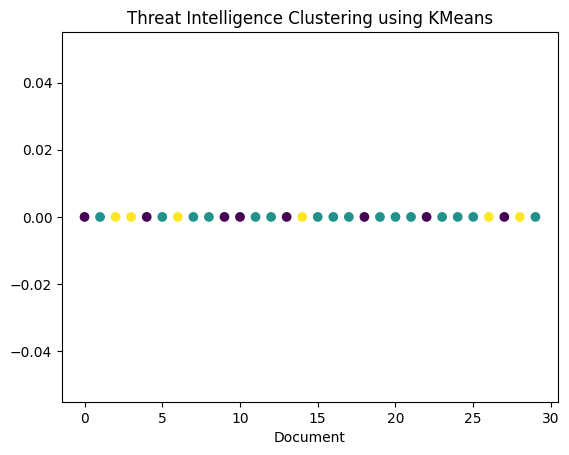

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ตัวอย่างข้อมูลข้อความจากแหล่ง Threat Intelligence
data = [
    "New ransomware attack targeting financial institutions",
    "APT group exploiting zero-day vulnerability in web servers",
    "Phishing campaign using fake job offers to steal credentials",
    "Malware spread via email attachments detected in healthcare sector",
    "DDoS attack targeting government websites",
    "New vulnerability in VPN software exposed to public",
    "Phishing email campaign impersonating bank to steal money",
    "Exploit in JavaScript engine allows remote code execution",
    "SQL injection vulnerability discovered in popular CMS",
    "New variant of Emotet malware targeting businesses",
    "Critical flaw in Windows SMB service exploited in global attack",
    "Cyber espionage group using social engineering to steal data",
    "Trojan virus detected in software updates of widely used application",
    "Large-scale botnet used for distributed denial of service (DDoS) attacks",
    "Phishing attack via fake COVID-19 vaccine information",
    "Ransomware as a Service platform discovered on the dark web",
    "APT group using compromised SolarWinds update to breach targets",
    "Exploiting unpatched vulnerabilities in remote desktop protocol (RDP)",
    "New malware sample identified targeting IoT devices",
    "Unsecured cloud storage exposes sensitive customer data",
    "Critical vulnerability in Apache Struts web framework",
    "Malicious insiders leaking sensitive information to competitors",
    "DDoS attack using IoT devices as botnet amplifiers",
    "Exfiltration of personal data through fake online surveys",
    "Social media account hijacking as part of larger information warfare operation",
    "Exploit for CVE-2020-0601 (Windows CryptoAPI vulnerability) used in cyber attacks",
    "Lateral movement detected in network after successful phishing attack",
    "Zero-day exploit targeting Adobe Flash Player discovered",
    "Malware distributed via fake software updates in email campaigns",
    "Suspicious activity detected on critical infrastructure network"
]


# ขั้นตอนที่ 1: แปลงข้อความเป็นเวกเตอร์ TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# ขั้นตอนที่ 2: ใช้ KMeans เพื่อกลุ่มข้อมูล
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# ขั้นตอนที่ 3: ตรวจสอบผลลัพธ์ของการจัดกลุ่ม
labels = kmeans.labels_
clusters = pd.DataFrame({'text': data, 'cluster': labels})

# ขั้นตอนที่ 4: การประเมินคุณภาพของการจัดกลุ่ม
silhouette = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette}')

# แสดงผลการจัดกลุ่ม
for cluster_num in range(3):
    print(f"\nCluster {cluster_num}:")
    print(clusters[clusters['cluster'] == cluster_num]['text'].values)

# ขั้นตอนที่ 5: การแสดงผลการจัดกลุ่ม
plt.scatter(range(len(data)), [0] * len(data), c=labels, cmap='viridis')
plt.xlabel("Document")
plt.title("Threat Intelligence Clustering using KMeans")
plt.show()


Detected 50 anomalous events.


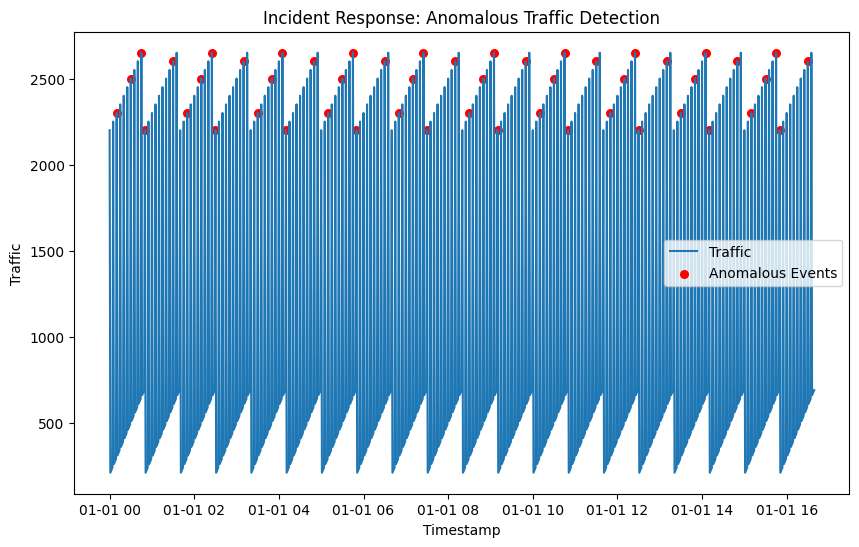

In [6]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# ตัวอย่างข้อมูลล็อก (log data) ที่มีการกระทำผิดปกติในเครือข่าย (สามารถใช้ข้อมูลจากไฟล์ CSV หรือแหล่งข้อมูลจริง)
# ในกรณีนี้จะใช้ตัวอย่างข้อมูลที่สุ่มสร้างขึ้นเพื่อสาธิต

# สร้าง DataFrame ตัวอย่าง
data = {
    'timestamp': pd.date_range('2025-01-01', periods=1000, freq='T'),
    'traffic': [200 + (i % 50) * 10 + (i % 5 == 0) * 2000 for i in range(1000)],  # traffic data with spikes
    'connections': [50 + (i % 20) * 5 + (i % 10 == 0) * 100 for i in range(1000)]  # connections data with periodic bursts
}
df = pd.DataFrame(data)

# ขั้นตอนที่ 1: การเลือกคุณสมบัติที่ใช้ในการตรวจจับเหตุการณ์
X = df[['traffic', 'connections']]

# ขั้นตอนที่ 2: การใช้ Isolation Forest ในการตรวจจับเหตุการณ์ผิดปกติ
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(X)

# ขั้นตอนที่ 3: การแสดงผลการตรวจจับเหตุการณ์ผิดปกติ (แสดงว่า -1 คือ anomalous, 1 คือ normal)
# จุดที่มีค่า 'anomaly' เป็น -1 คือลักษณะของเหตุการณ์ที่ผิดปกติ

anomalies = df[df['anomaly'] == -1]

# แสดงผลการตรวจจับ anomalous events
print(f"Detected {len(anomalies)} anomalous events.")

# ขั้นตอนที่ 4: การแสดงกราฟเพื่อดูการกระจายของข้อมูลพร้อมการแสดงเหตุการณ์ผิดปกติ
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['traffic'], label='Traffic')
plt.scatter(anomalies['timestamp'], anomalies['traffic'], color='red', label='Anomalous Events', s=30)
plt.title('Incident Response: Anomalous Traffic Detection')
plt.xlabel('Timestamp')
plt.ylabel('Traffic')
plt.legend()
plt.show()


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import random

# ตัวอย่างข้อมูลข้อความจากแหล่ง Threat Intelligence
data = [
    "New ransomware attack targeting financial institutions",
    "APT group exploiting zero-day vulnerability in web servers",
    "Phishing campaign using fake job offers to steal credentials",
    "Malware spread via email attachments detected in healthcare sector",
    "DDoS attack targeting government websites",
    "New vulnerability in VPN software exposed to public",
    "Phishing email campaign impersonating bank to steal money",
    "Exploit in JavaScript engine allows remote code execution"
]

# ขั้นตอนที่ 1: แปลงข้อความเป็นเวกเตอร์ TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# ขั้นตอนที่ 2: ใช้ KMeans เพื่อกลุ่มข้อมูล
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# ขั้นตอนที่ 3: ตรวจสอบผลลัพธ์ของการจัดกลุ่ม
labels = kmeans.labels_
clusters = pd.DataFrame({'text': data, 'cluster': labels})

# ขั้นตอนที่ 4: กำหนดมาตรการตอบสนอง
def incident_response(cluster):
    responses = {
        0: "Trigger Ransomware mitigation procedures. Isolate infected systems.",
        1: "Initiate investigation on APT group. Patch vulnerable servers.",
        2: "Block phishing emails and alert users about suspicious job offers.",
        3: "Initiate DDoS protection. Activate rate limiting on government websites."
    }
    return responses.get(cluster, "No immediate response required.")

# ขั้นตอนที่ 5: การตอบสนองตามการจัดกลุ่ม
for cluster_num in range(3):
    print(f"\nCluster {cluster_num}:")
    print(clusters[clusters['cluster'] == cluster_num]['text'].values)
    # รับการตอบสนองจากแต่ละกลุ่ม
    response = incident_response(cluster_num)
    print("Response Action:", response)



Cluster 0:
['New ransomware attack targeting financial institutions'
 'DDoS attack targeting government websites'
 'New vulnerability in VPN software exposed to public']
Response Action: Trigger Ransomware mitigation procedures. Isolate infected systems.

Cluster 1:
['Phishing campaign using fake job offers to steal credentials'
 'Phishing email campaign impersonating bank to steal money']
Response Action: Initiate investigation on APT group. Patch vulnerable servers.

Cluster 2:
['APT group exploiting zero-day vulnerability in web servers'
 'Malware spread via email attachments detected in healthcare sector'
 'Exploit in JavaScript engine allows remote code execution']
Response Action: Block phishing emails and alert users about suspicious job offers.


         id                                               text  \
0         1  This post is also available in:      日本語 (Japa...   
1         2  The attack vector is very basic and repeats it...   
2         3  Once executed by the user the first stage malw...   
3         4   The first known campaign was launched by Crim...   
4         5  The first stage downloaded the ransomware from...   
...     ...                                                ...   
9727  14417  In both cases the intelligence coming from end...   
9728  14418  Most attacks today, including ransomware, are ...   
9729  14419  Including detection of this as part of an over...   
9730  14420  Stay tuned for more upcoming blogs on how XDR ...   
9731  14421        Tags  Cloud | APT & Targeted Attacks | C...   

                                               entities relations Comments  
0     [{'id': 45800, 'label': 'malware', 'start_offs...        []       []  
1     [{'id': 48941, 'label': 'attack-pattern', 'sta.

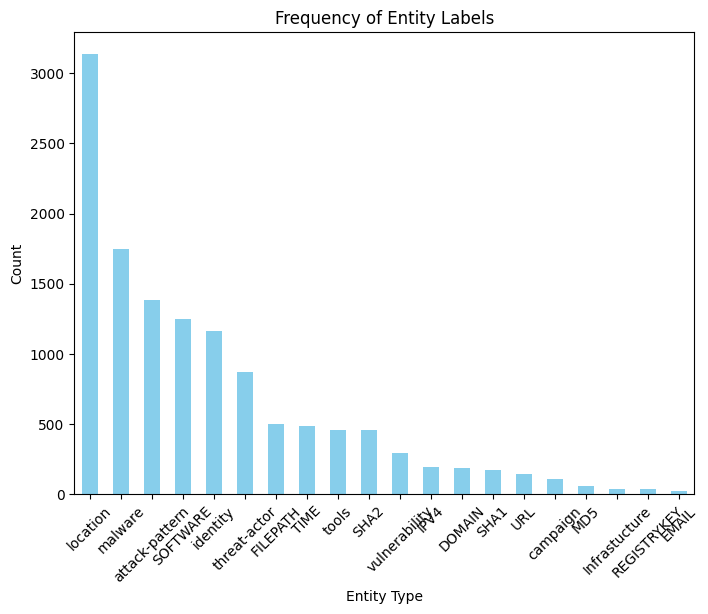

In [12]:
import pandas as pd
import json

# อ่านข้อมูลจากไฟล์ all.jsonl
file_path = '/mnt/d/research/archive/all.jsonl'

# ฟังก์ชันในการอ่านข้อมูลจากไฟล์ JSONL
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

# ดึงข้อมูลจากไฟล์
data = read_jsonl(file_path)

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(data)

# แสดงข้อมูล DataFrame
print(df)

# การดึงออกมาของ Entities จากข้อมูล
entities = []
for index, row in df.iterrows():
    for entity in row.get('entities', []):
        entities.append({
            'text': row['text'],
            'entity_label': entity['label'],
            'entity': row['text'][entity['start_offset']:entity['end_offset']],
            'start_offset': entity['start_offset'],
            'end_offset': entity['end_offset']
        })

entities_df = pd.DataFrame(entities)

# แสดงข้อมูล Entity
print(entities_df)

# การแสดงกราฟการกระจายของ Entity Labels
entity_counts = entities_df['entity_label'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
entity_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Entity Labels')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# อ่านข้อมูลจากไฟล์ SMSSpamCollection
file_path = '/mnt/d/research/archive/SMSSpamCollection'  # ปรับให้ตรงกับที่อยู่ของไฟล์ของคุณ
data = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# แบ่งข้อมูลเป็น train และ test
X = data['message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ใช้ TF-IDF Vectorizer เพื่อแปลงข้อความเป็นเวกเตอร์
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# สร้างและฝึกโมเดล Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# ทำนายผลลัพธ์
y_pred = model.predict(X_test_tfidf)

# แสดงผลการทดสอบ
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# อ่านข้อมูลจากไฟล์ SMSSpamCollection
file_path = '/mnt/d/research/archive/SMSSpamCollection'  # ปรับให้ตรงกับที่อยู่ของไฟล์ของคุณ
data = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# แสดงข้อมูลตัวอย่าง
print(data.head())

# แบ่งข้อมูลเป็น train และ test
X = data['message']
y = data['label']

# ใช้ train_test_split เพื่อแบ่งข้อมูลเป็นชุดฝึกและทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ใช้ TF-IDF Vectorizer เพื่อแปลงข้อความเป็นเวกเตอร์
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# สร้างและฝึกโมเดล Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# ทำนายผลลัพธ์
y_pred = model.predict(X_test_tfidf)

# แสดงผลการทดสอบ
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ตัวอย่างการตรวจจับข้อความใหม่ (เช่น Phishing หรือ Spam)
example_message = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question."]
example_tfidf = vectorizer.transform(example_message)
predicted_label = model.predict(example_tfidf)

print("\nPredicted label for the new message:", predicted_label[0])


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Predicted label for the new message: spam


Threat Intelligence

โค้ดนี้ช่วยดึงข้อมูลจากไฟล์ JSONL ที่มีรายละเอียดเกี่ยวกับภัยคุกคาม เช่น malware หรือ attack patterns
นำข้อมูลมาวิเคราะห์ว่าในข้อความแต่ละข้อความมี IoC (Indicators of Compromise) อะไรบ้าง เช่น ชื่อของมัลแวร์หรือวิธีการโจมตี

อ่านไฟล์ JSONL: โหลดข้อมูลภัยคุกคามทั้งหมดเข้ามา
แสดงข้อมูล IoC: เช่น คำว่า malware หรือ attack-pattern ถูกพบกี่ครั้งในชุดข้อมูล
แสดงข้อความเกี่ยวกับภัยคุกคาม: ดึงตัวอย่างข้อความที่เกี่ยวข้องกับ IoC เพื่อช่วยให้คุณเข้าใจภัยคุกคามได้ดีขึ้น

Indicators of Compromise (IoC) คือเบาะแสที่บ่งบอกถึงการโจมตีหรือการละเมิดความปลอดภัยในระบบ

In [16]:
import json
import pandas as pd

# อ่านข้อมูล JSONL (Threat Intelligence Dataset)
file_path = "all.jsonl"  # ชื่อไฟล์ของคุณ
data = []

# โหลดข้อมูลจากไฟล์ JSONL
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(data)

# แสดงข้อมูลเบื้องต้น
print("ข้อมูลทั้งหมด:")
print(df.head())

# วิเคราะห์ IoC (เช่น malware, attack patterns)
print("\nการวิเคราะห์ IoC:")
if "entities" in df.columns:
    ioc_data = []
    for row in df['entities']:
        for entity in row:
            ioc_data.append(entity)
    ioc_df = pd.DataFrame(ioc_data)
    print(ioc_df['label'].value_counts())

# สรุปข้อมูลภัยคุกคาม
print("\nสรุปภัยคุกคาม:")
if "text" in df.columns:
    for text in df['text'][:5]:
        print(f"- {text}")


ข้อมูลทั้งหมด:
   id                                               text  \
0   1  This post is also available in:      日本語 (Japa...   
1   2  The attack vector is very basic and repeats it...   
2   3  Once executed by the user the first stage malw...   
3   4   The first known campaign was launched by Crim...   
4   5  The first stage downloaded the ransomware from...   

                                            entities relations Comments  
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []  
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []  
2                                                 []        []       []  
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []  
4                                                 []        []       []  

การวิเคราะห์ IoC:
label
location          3137
malware           1750
attack-pattern    1380
SOFTWARE          1246
identity          1160
threat-actor       870
FILEPATH         

 Incident Response

โค้ดนี้ช่วยจัดกลุ่มข้อความเหตุการณ์ เช่น การแจ้งเตือนเกี่ยวกับการโจมตีทางไซเบอร์ โดยใช้การเรียนรู้ของเครื่อง (Machine Learning) เพื่อลดความซับซ้อน
เหมาะสำหรับทีม Incident Response ที่ต้องจัดการข้อความแจ้งเตือนจำนวนมากและต้องการมองหาความเชื่อมโยงหรือกลุ่มเหตุการณ์ที่คล้ายกัน

/home/sataporn/.local/share/virtualenvs/flaskApp0-991fy1py/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



ข้อความที่ถูกจัดกลุ่ม:

Cluster 0:
- The attack vector is very basic and repeats itself: It begins with a spear phishing email sent with SCR attachments (double zipped).
-  Palo Alto Networks Enterprise Security Platform offers multilayer protection to prevent this attack along with other attacks without the need for prior knowledge of the specific attack.
- The other list is of last week’s campaign by the same attackers (exhaustive or close to it).  Palo Alto Networks Enterprise Security Platform would have stopped this ransomware attack campaign thanks to the platform’s unique integration between the network, endpoint and the cloud to maximize security.

Cluster 1:
- Figure 3: Price of Monero in U.S. dollars from CoinMarketCap  
- We show some examples in Figure 11.
- Figure 12.

Cluster 2:
- This post is also available in:      日本語 (Japanese)  CTB-Locker is a well-known ransomware Trojan used by crimeware groups to encrypt files on the victim's endpoints and demand ransom payment t

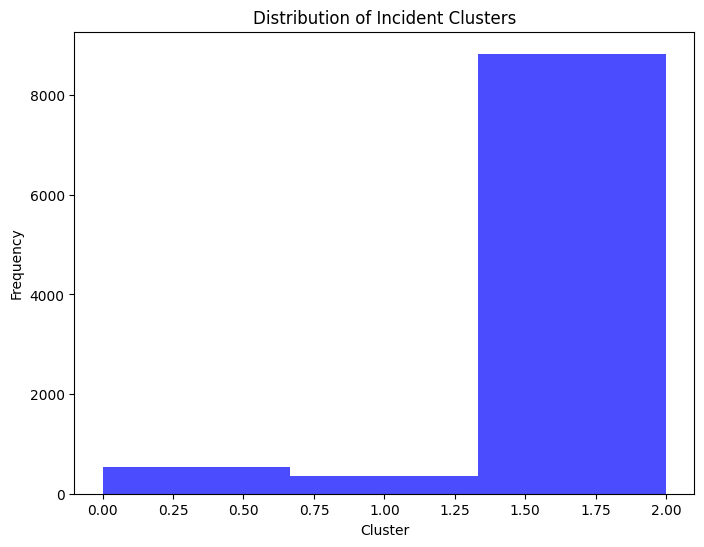

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ดึงข้อความเหตุการณ์สำหรับ Incident Response
incident_texts = df['text']

# ใช้ TF-IDF Vectorizer เพื่อแปลงข้อความ
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(incident_texts)

# ใช้ K-Means Clustering เพื่อจัดกลุ่มเหตุการณ์
n_clusters = 3  # สามารถปรับเปลี่ยนได้ตามความต้องการ
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# เพิ่ม Cluster ลงใน DataFrame
df['cluster'] = kmeans.labels_

# แสดงผลข้อความที่ถูกจัดกลุ่ม
print("\nข้อความที่ถูกจัดกลุ่ม:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_texts = df[df['cluster'] == cluster]['text']
    for text in cluster_texts[:3]:  # แสดงตัวอย่าง 3 ข้อความแรก
        print(f"- {text}")

# สร้างกราฟสำหรับ Cluster
plt.figure(figsize=(8, 6))
plt.hist(df['cluster'], bins=n_clusters, alpha=0.7, color='blue')
plt.title("Distribution of Incident Clusters")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show()


In [19]:
from collections import defaultdict

# อ่าน Log File
def detect_brute_force(log_file, threshold=3):
    ip_attempts = defaultdict(int)

    with open(log_file, "r") as file:
        for line in file:
            if "POST /login" in line:  # เช็คเฉพาะการ Login
                ip = line.split()[0]
                ip_attempts[ip] += 1

    # ตรวจจับ Brute Force
    print("IP ที่น่าสงสัย (พยายาม Login เกิน {} ครั้ง):".format(threshold))
    for ip, attempts in ip_attempts.items():
        if attempts > threshold:
            print(f" - IP: {ip}, จำนวนครั้ง: {attempts}")

# รันฟังก์ชันตรวจสอบ
detect_brute_force("access.log")


IP ที่น่าสงสัย (พยายาม Login เกิน 3 ครั้ง):
 - IP: 192.168.1.1, จำนวนครั้ง: 4


In [ ]:
import requests

# API Key ของ VirusTotal
API_KEY = "b23c07668f7e98e1882f457ab1e28c66d2cddbc6fa744f3c1f66c95652012d64"  # ใส่ API Key ของคุณที่นี่
VT_URL = "https://www.virustotal.com/api/v3/ip_addresses/"

# ฟังก์ชันตรวจสอบ IP ว่าเป็นอันตรายหรือไม่
def check_ip(ip):
    headers = {
        "x-apikey": API_KEY
    }
    response = requests.get(VT_URL + ip, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        malicious_count = data['data']['attributes']['last_analysis_stats']['malicious']
        if malicious_count > 0:
            print(f"IP: {ip} มีความเสี่ยง ({malicious_count} รายงานอันตราย)")
        else:
            print(f"IP: {ip} ปลอดภัย")
    else:
        print(f"Error: {response.status_code}, ตรวจสอบ IP ไม่สำเร็จ")

# ตัวอย่างการตรวจสอบ
ip_to_check = "8.8.8.8"  # ตัวอย่าง IP
check_ip(ip_to_check)


IP: 8.8.8.8 ปลอดภัย


In [ ]:
import os
import requests

# VirusTotal API Key
API_KEY = "b23c07668f7e98e1882f457ab1e28c66d2cddbc6fa744f3c1f66c95652012d64"
VT_URL = "https://www.virustotal.com/api/v3/ip_addresses/"

# ฟังก์ชันตรวจสอบ IP
def check_ip(ip):
    headers = {
        "x-apikey": API_KEY
    }
    response = requests.get(VT_URL + ip, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        malicious_count = data['data']['attributes']['last_analysis_stats']['malicious']
        return malicious_count > 0  # คืนค่า True ถ้า IP มีความเสี่ยง
    return False

# บล็อก IP ด้วย iptables (Linux)
def block_ip(ip):
    os.system(f"sudo iptables -A INPUT -s {ip} -j DROP")
    print(f"บล็อก IP: {ip} เรียบร้อยแล้ว")

# ตัวอย่างการตรวจสอบและบล็อก IP
suspicious_ips = ["8.8.8.8", "1.1.1.1"]  # ตัวอย่าง IP
for ip in suspicious_ips:
    if check_ip(ip):
        block_ip(ip)



Frame name: <module>
Line number: 15
 * Serving Flask app '__main__'
 * Debug mode: on


  File "/tmp/ipykernel_14779/3946683700.py", line 5, in <module>
    1 / 0
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [2]:
import requests
import csv

API_KEY = "b23c07668f7e98e1882f457ab1e28c66d2cddbc6fa744f3c1f66c95652012d64"
ABUSE_IP_URL = "https://api.abuseipdb.com/api/v2/check"

def check_ip_reputation(ip):
    headers = {
        'Accept': 'application/json',
        'Key': API_KEY
    }
    params = {'ipAddress': ip, 'maxAgeInDays': 90}
    response = requests.get(ABUSE_IP_URL, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        return data['data']['abuseConfidenceScore']
    else:
        return None

# อ่าน IP จากไฟล์ CSV และเช็คสถานะ
def bulk_check(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            ip = row[0]
            score = check_ip_reputation(ip)
            print(f"IP: {ip}, Confidence Score: {score}")

# เรียกใช้ Bulk Scan
bulk_check("ip_list.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'ip_list.csv'

In [3]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# สร้างตัวอย่าง Log Data
data = {'ip': ['192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.1', '192.168.1.1'],
        'attempts': [10, 2, 1, 15, 20]}  # จำนวนความพยายามต่อ IP
df = pd.DataFrame(data)

# ใช้ Isolation Forest ในการตรวจจับ IP ผิดปกติ
model = IsolationForest(contamination=0.2)  # ตั้งค่าความผิดปกติ 20%
df['anomaly'] = model.fit_predict(df[['attempts']])

# แสดงผลลัพธ์
print(df[df['anomaly'] == -1])  # แสดง IP ที่ผิดปกติ


            ip  attempts  anomaly
4  192.168.1.1        20       -1


In [5]:
import requests

# แหล่งข้อมูล IP อันตราย
SOURCES = [
    "https://otx.alienvault.com/api/v1/indicators/ip/",
    "https://api.abuseipdb.com/api/v2/check"
]

# ตัวอย่าง IP ที่ต้องการตรวจสอบ
IP_LIST = ["8.8.8.8", "1.1.1.1"]

def enrich_ip(ip):
    for source in SOURCES:
        print(f"Fetching data for {ip} from {source}")
        # คุณสามารถต่อ API หรือใช้ Threat Feed จากหลายแหล่งที่นี่
        # เพิ่มการแสดงผล เช่น Threat Score, Country, รายงานอันตราย ฯลฯ

# ทดสอบการทำงาน
for ip in IP_LIST:
    enrich_ip(ip)


Fetching data for 8.8.8.8 from https://otx.alienvault.com/api/v1/indicators/ip/
Fetching data for 8.8.8.8 from https://api.abuseipdb.com/api/v2/check
Fetching data for 1.1.1.1 from https://otx.alienvault.com/api/v1/indicators/ip/
Fetching data for 1.1.1.1 from https://api.abuseipdb.com/api/v2/check


In [ ]:
import os
import smtplib

# ฟังก์ชันบล็อก IP
def block_ip(ip):
    os.system(f"sudo iptables -A INPUT -s {ip} -j DROP")
    print(f"Blocked IP: {ip}")

# ฟังก์ชันส่งอีเมลแจ้งเตือน
def send_alert(ip):
    sender_email = "your_email@example.com"
    receiver_email = "admin@example.com"
    password = "your_password"
    message = f"Subject: Alert: Suspicious IP Detected\n\nIP {ip} has been blocked."
    
    with smtplib.SMTP("smtp.gmail.com", 587) as server:
        server.starttls()
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

# ทดสอบระบบตอบสนอง
suspicious_ip = "192.168.1.1"
block_ip(suspicious_ip)
send_alert(suspicious_ip)


Threat Intelligence: การวิเคราะห์ Malware Hashes ด้วย VirusTotal API
เป้าหมาย:
สร้างระบบที่ดึง Hash ของไฟล์ ที่สงสัยว่าเป็น Malware มาจาก VirusTotal เพื่อดูว่ามีการรายงานว่าเป็น Malware หรือไม่.

In [2]:
import requests

# API Key ของ VirusTotal
API_KEY = "b23c07668f7e98e1882f457ab1e28c66d2cddbc6fa744f3c1f66c95652012d64"
VT_URL = "https://www.virustotal.com/api/v3/files/"

# ฟังก์ชันตรวจสอบไฟล์ด้วย Hash
def check_file_hash(file_hash):
    headers = {
        "x-apikey": API_KEY
    }
    response = requests.get(VT_URL + file_hash, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        malicious_count = data['data']['attributes']['last_analysis_stats']['malicious']
        if malicious_count > 0:
            print(f"ไฟล์ที่มี Hash: {file_hash} เป็น Malware ({malicious_count} รายงานอันตราย)")
        else:
            print(f"ไฟล์ที่มี Hash: {file_hash} ปลอดภัย")
    else:
        print(f"Error: {response.status_code}, ตรวจสอบ Hash ไม่สำเร็จ")

# ตัวอย่าง Hash ที่จะตรวจสอบ
file_hash = "e99a18c428cb38d5f260853678922e03"  # เปลี่ยนเป็น Hash ของไฟล์จริงที่ต้องการตรวจสอบ
check_file_hash(file_hash)


ไฟล์ที่มี Hash: e99a18c428cb38d5f260853678922e03 ปลอดภัย


In [5]:
import os
import requests

# ฟังก์ชันตรวจสอบ IP จาก VirusTotal (อ้างอิงจากตัวอย่างก่อนหน้า)
def check_ip(ip, api_key):
    vt_url = f"https://www.virustotal.com/api/v3/ip_addresses/{ip}"
    headers = {
        "x-apikey": api_key
    }
    response = requests.get(vt_url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        malicious_count = data['data']['attributes']['last_analysis_stats']['malicious']
        return malicious_count > 0  # ถ้ามีการรายงานว่าเป็นอันตราย
    return False

# ฟังก์ชันบล็อก IP ในระบบ
def block_ip(ip):
    os.system(f"sudo iptables -A INPUT -s {ip} -j DROP")
    print(f"IP: {ip} ถูกบล็อกเรียบร้อยแล้ว")

# ตัวอย่าง IP ที่สงสัยว่าอาจเป็นการโจมตี
ip_to_check = "8.8.8.8"
api_key = "b23c07668f7e98e1882f457ab1e28c66d2cddbc6fa744f3c1f66c95652012d64"

# ตรวจสอบ IP และบล็อกถ้าจำเป็น
if check_ip(ip_to_check, api_key):
    block_ip(ip_to_check)


In [ ]:
import requests

# API ของ AbuseIPDB สำหรับดึงข้อมูล IP ที่เป็นอันตราย
API_KEY = "57d2236f9e951d21c72477930733245074acfd552dd6b9a16793097de09a570981d29b1abe63cd94"
ABUSEIPDB_URL = "https://api.abuseipdb.com/api/v2/blacklist"

# ฟังก์ชันดึงข้อมูล IoC
def get_iocs():
    headers = {
        "Key": API_KEY,
        "Accept": "application/json"
    }
    response = requests.get(ABUSEIPDB_URL, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        iocs = data.get('data', [])
        for ioc in iocs:
            print(f"IP: {ioc['ipAddress']} - Reported: {ioc['abuseConfidenceScore']}%")
    else:
        print(f"Error: {response.status_code}")

# ดึงข้อมูล IoC
get_iocs()


IP: 150.162.233.150 - Reported: 100%
IP: 83.144.124.50 - Reported: 100%
IP: 218.92.0.198 - Reported: 100%
IP: 103.48.192.48 - Reported: 100%
IP: 106.51.64.158 - Reported: 100%
IP: 103.106.104.187 - Reported: 100%
IP: 92.255.85.253 - Reported: 100%
IP: 196.70.192.40 - Reported: 100%
IP: 185.145.127.182 - Reported: 100%
IP: 199.45.154.141 - Reported: 100%
IP: 218.92.0.230 - Reported: 100%
IP: 175.206.46.56 - Reported: 100%
IP: 14.103.115.156 - Reported: 100%
IP: 212.192.42.211 - Reported: 100%
IP: 117.33.249.211 - Reported: 100%
IP: 207.231.110.192 - Reported: 100%
IP: 185.142.236.35 - Reported: 100%
IP: 185.148.253.22 - Reported: 100%
IP: 159.203.128.174 - Reported: 100%
IP: 49.247.36.49 - Reported: 100%
IP: 54.36.108.223 - Reported: 100%
IP: 42.240.131.8 - Reported: 100%
IP: 45.8.46.60 - Reported: 100%
IP: 185.165.191.27 - Reported: 100%
IP: 103.193.177.163 - Reported: 100%
IP: 185.147.124.54 - Reported: 100%
IP: 115.241.83.2 - Reported: 100%
IP: 43.226.39.206 - Reported: 100%
IP: 64.2